# Анализ сервиса аренды самокатов GoFast

<div style="border:solid Chocolate 2px; padding: 40px">
    
    
**Описание проекта**  
    Имеем информацию сервиса аренды самокатов GoFast.Известны данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйем данные и проверем некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

без подписки
абонентская плата отсутствует;
стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей;
с подпиской Ultra
абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.


<div style="border:solid Chocolate 2px; padding: 40px">
    
    
**Описание данных**

Пользователи — users_go.csv

user_id — уникальный идентификатор пользователя  
name — имя пользователя  
age — возраст  
city — город  
subscription_type — тип подписки (free, ultra)

Поeздки — rides_go.csv

user_id — уникальный идентификатор пользователя  
distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)  
duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»  
date — дата совершения поездки

Подписки — subscriptions_go.csv

subscription_type — тип подписки  
minute_price — стоимость одной минуты поездки по данной подписке  
start_ride_price — стоимость начала поездки  
subscription_fee — стоимость ежемесячного платежа

<div style="border:solid Chocolate 2px; padding: 40px">
    
    
**План работы**
    
1. Загрузка данных и изучение данных
2. Предобработка данных  
    2.1 Приведите столбец date к типу даты pandas.  
    2.2 Создайте новый столбец с номером месяца на основе столбца date.  
    2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.
3. Исследовательский анализ данных  
Опишите и визуализируйте общую информацию о пользователях и поездках:  
    3.1 частота встречаемости городов;  
    3.2 соотношение пользователей с подпиской и без подписки;  
    3.3 возраст пользователей;  
    3.4 расстояние, которое пользователь преодолел за одну поездку;  
    3.5 продолжительность поездок.
4. Объединение данных  
    4.1 Объедините датафреймов  
    4.2 Создание датафрейма c данными о пользователях без подписки  
    4.3 Создание датафрейма c данными о пользователях с подпиской  
    4.4 Информация о расстоянии и времени поездок для пользователей без подписоки  
    4.5 Информация о расстоянии и времени поездок для пользователей без подписокой
5. Подсчёт выручки  
    5.1 Информация о расстоянии, количестве поездок и времени для каждого пользователя за каждый месяц  
    5.2 Информация с помесячной выручкой, которую принёс каждый пользователь
6. Проверка гипотез  
Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов  
    6.1 Тратят ли пользователи с подпиской больше времени на поездки  
    6.2 Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров  
    6.3 Выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки  
    6.4 Мобильное приложение снизило количество обращений в техподдержку  
7. Общий вывод


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st
import glob

## 1. Загрузка данных и изучение данных

In [2]:
data_users = pd.read_csv('/datasets/users_go.csv') # cчитаем CSV-файлы с данными
display(data_users.head(10)) # выведем первые строки 

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [3]:
data_users.info() # выведем общую информацию 
data_users.isna().sum() # проверим пропуски данных
shape = data_users.shape
display(shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


(1565, 5)

In [4]:
data_riders = pd.read_csv('/datasets/rides_go.csv') # cчитаем CSV-файлы с данными
data_riders.sample(10) # выведем случайные строки (так как вывод первых показал данные только по 1 user)

,user_id,distance,duration,date
7054,738,4828.653765,22.042307,2021-06-16
13815,1232,3721.625615,15.149888,2021-12-11
13355,1201,3774.782937,28.177641,2021-12-27
6092,653,4344.006660,16.308586,2021-02-28
16485,1422,695.869436,12.739674,2021-02-14
3730,401,2768.854486,10.551421,2021-10-06
9934,953,2800.217732,21.400653,2021-02-26
9628,932,3375.789240,28.413396,2021-02-19
1179,127,3795.931451,22.387794,2021-02-08
4374,470,4106.293040,23.198981,2021-11-20


In [5]:
data_riders.info() # выведем общую информацию 
data_riders.isna().sum() # проверим пропуски данных
shape = data_riders.shape
print(shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
(18068, 4)


In [6]:
data_sub = pd.read_csv('/datasets/subscriptions_go.csv') # cчитаем CSV-файлы с данными
display(data_sub) # выводим таблицу полностью, так как она состоит из малого количества данных
shape = data_sub.shape
print(shape)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


(2, 4)


## 1. Вывод 

Загрузили и рассмотрели данные.
Выявили столбцы данных с которыми нужно провести предобработку:
1. В таблице с пользователями данные соответствуют необходимым типам. Данные выглядят объективно и понятно.
2. В таблице с поездками видим в столбце date тип object. Предобработем его в следующем шаге. Так же видим большое количество знаков после запятой в столбцах distance  и duration, возможно нужно будет округлить данные.
3. В таблице подписок сразу видим весь объем данных. Он нам полностью подходит для проведения дальнейшей работы.
4. Узнали, что в таблицах с данными отсутствуют пропуски.


## 2. Предобработка данных

### 2.1. Приведем тип  date к типу дата

In [7]:
data_riders['date'] = pd.to_datetime(data_riders['date'], format = '%Y-%m-%d') # приведем тип  date в типу дата
data_riders.info() # выведем общую информацию 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


### 2.2. Создаем новый столбец с номером месяца

In [8]:
data_riders['date'].dt.year.unique()

array([2021])

In [9]:
data_riders['month'] = data_riders['date'].dt.month
data_riders['month'].sample(10)

149       4
5701      6
7745      6
15654    11
11232    10
7094     10
2276     11
17058     1
12754    12
4524      3
Name: month, dtype: int64

### 2.3. Обработка дубликатов 

In [10]:
data_users.duplicated().sum()  
data_users.drop_duplicates(inplace=True) # удалим дубликаты

In [11]:
shape = data_users.shape
display(shape)

(1534, 5)

In [12]:
data_riders.duplicated().sum() 

0

In [13]:
data_sub.duplicated().sum() 

0

## 2. Вывод

Предобработали данные.
1. Сменили тип объекта по столбцу date на тип datetime64
2. Узнали, что данные приведены за 2021 год и добавили столбец month  с номером месяца в таблицу поездок.
3. В таблицах с поездками и подписками дубликаты отсутствуют.
4. В таблице с пользователями избавились от дубликатов. Проверили объем таблицы Удален 31 дубликат. 


## 3. Исследовательский анализ данных

### 3.1. Частота встречаемости городов

In [14]:
count_city = data_users['city'].value_counts()
print(count_city)

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


In [15]:
count_city['rate'] = round(data_users['city'].value_counts() / count_city.sum(), 2) * 100
display(count_city['rate'])

Пятигорск         14.0
Екатеринбург      13.0
Ростов-на-Дону    13.0
Краснодар         13.0
Сочи              12.0
Омск              12.0
Тюмень            12.0
Москва            11.0
Name: city, dtype: float64

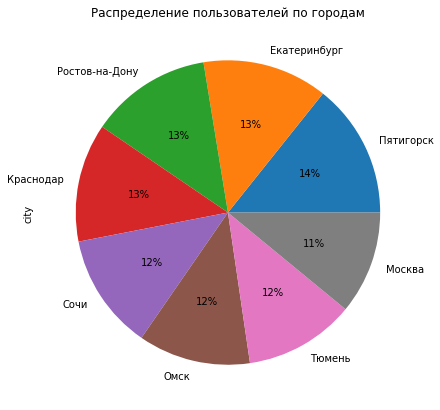

In [16]:
data_users['city'].value_counts().plot(
    kind = 'pie', 
    y = count_city,
    autopct = '%1.0f%%',
    figsize=(7,7), 
    title = 'Распределение пользователей по городам');

### 3.2. Cоотношение пользователей с подпиской и без подписки

In [17]:
count_sub = data_users['subscription_type'].value_counts()


In [18]:
count_sub

free     835
ultra    699
Name: subscription_type, dtype: int64

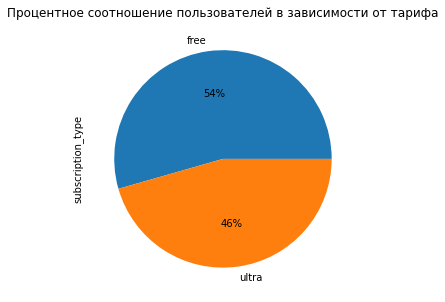

In [19]:
data_users['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = None, 
    autopct = '%1.0f%%', 
    figsize=(5,5),
    title = 'Процентное соотношение пользователей в зависимости от тарифа');

### 3.3. Возраст пользователей

In [20]:
count_age = data_users['age'].value_counts()
print(count_age)

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64


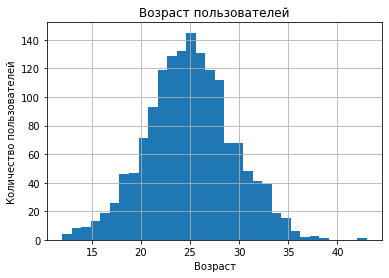

In [21]:
plt.hist(data_users['age'], bins = 32)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [22]:
data_users['age']. describe ()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

### 3.4. Расстояние, которое пользователь преодолел за одну поездку

In [23]:
round(data_riders['distance'].sort_values(), 2)

11555       0.86
9541        2.57
13690       4.33
8658        6.78
7841        7.10
          ...   
17242    6724.93
17171    6760.94
15580    6908.49
16484    7066.00
16309    7211.01
Name: distance, Length: 18068, dtype: float64

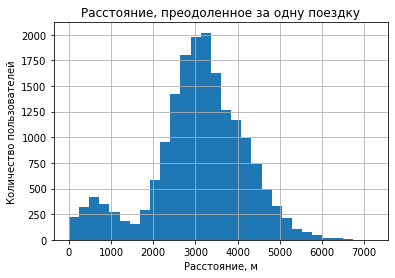

In [24]:
plt.hist(data_riders['distance'], bins = 30)
plt.title('Расстояние, преодоленное за одну поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

### 3.5.  Продолжительность поездок

In [25]:
data_riders['duration'].sort_values()

12013     0.500000
17314     0.500000
15029     0.500000
7437      0.500000
12967     0.500000
           ...    
6453     38.265229
1998     38.352763
2623     39.526602
4709     39.873856
4215     40.823963
Name: duration, Length: 18068, dtype: float64

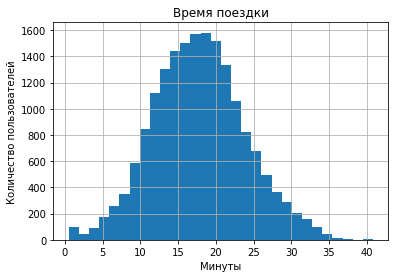

In [26]:
plt.hist(data_riders['duration'], bins = 30) 
plt.title('Время поездки')
plt.xlabel('Минуты')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

## 3. Вывод 
Исследовали данные 

1. Количество пользователей в различных городах

Распределение пользователей по городам примерно одинаково, нет высоких значений. Самым популярным городом среди пользователей является Пятигорск с 219 пользователями. Наименьшее количество пользователей можно обнаружить в Москве - 168. Вероятно, такое распределение связано с разницей в размере этих городов. В Пятигорске более удобно использовать самокаты для перемещения.

2. Соотношение пользователей с подпиской и без подписки

Большая часть пользователей (835 человек) использует бесплатную подписку, что составляет около 54% от общего числа пользователей. Платную подписку использует 699 пользователей, что составляет примерно 46%.

3. Возраст пользователей

Наиболее молодыми пользователями являются те, кто имеет возраст 12 и 13 лет. Самой старшей возрастной группой являются пользователи в возрасте 43 и 39 лет. В целом, основная аудитория приложения состоит в возрасте от 20 до 30 лет.

4. Пройденное пользователем расстояние за одну поездку

Наиболее короткое расстояние составляет 0,86 км, в то время как самое большое - 7,2 км. Обычно пользователи проезжают от 2,5 км до 4 км.

5. Продолжительность поездок

Наиболее короткие поездки длительностью полминуты выглядят очень странно. Возможно, пользователи просто изменили свои планы или возникли проблемы с самокатом. Самая долгая поездка длилась 40 минут. В большинстве случаев продолжительность поездки составляет от 13 до 22 минут.

## 4. Объединение данных

### 4.1.  Объедините датафреймов

In [27]:
full_data = data_users.merge(data_riders)
full_data = full_data.merge(data_sub)
display(full_data)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [28]:
shape = data_riders.shape
display(shape)

(18068, 5)

### 4.2.  Создание датафрейма c данными о пользователях без подписки

In [29]:
free_data = full_data.query("`subscription_type` == 'free'")
display(free_data)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


### 4.3.  Создание датафрейма c данными о пользователях с подпиской

In [30]:
ultra_data = full_data.query("`subscription_type` == 'ultra'")
display(ultra_data)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


### 4.4. Информация о расстоянии и времени поездок для пользователей без подписоки

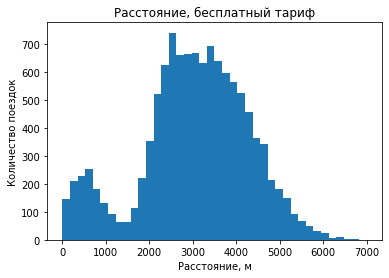

<Figure size 1440x1440 with 0 Axes>

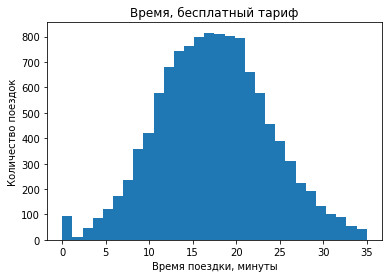

<Figure size 1440x1440 with 0 Axes>

In [31]:
plt.hist(free_data['distance'], bins=40, range = (0, 7000))
plt.title('Расстояние, бесплатный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

plt.hist(free_data['duration'], bins=30, range = (0, 35))
plt.title('Время, бесплатный тариф')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()


### 4.5. Информация о расстоянии и времени поездок для пользователей без подписокой

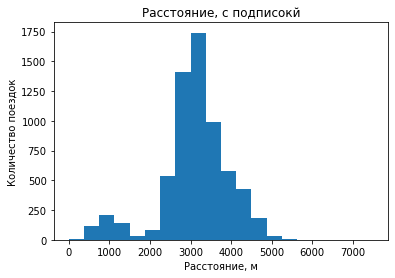

<Figure size 1440x1440 with 0 Axes>

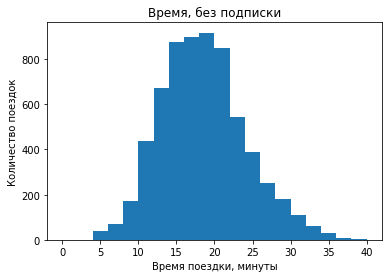

<Figure size 1440x1440 with 0 Axes>

In [32]:
plt.hist(ultra_data['distance'], bins=20, range = (0, 7500))
plt.title('Расстояние, с подписокй')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

plt.hist(ultra_data['duration'], bins=20, range = (0, 40))
plt.title('Время, без подписки')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

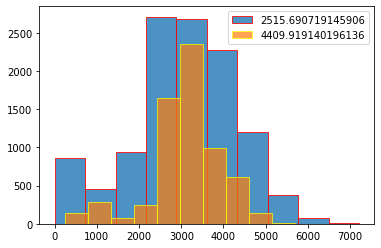

In [33]:
# plotting first histogram
plt.hist(free_data['distance'], label=free_data['distance'], alpha=.8, edgecolor='red')
 
# plotting second histogram
plt.hist(ultra_data['distance'], label=ultra_data['distance'], alpha=0.7, edgecolor='yellow')
plt.legend()
 
# Showing the plot using plt.show()
plt.show()

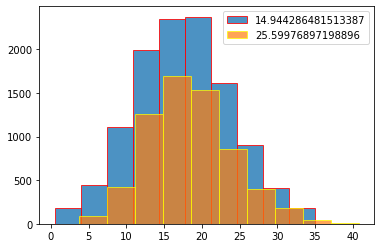

In [34]:
# plotting first histogram
plt.hist(free_data['duration'], label=free_data['duration'], alpha=.8, edgecolor='red')
 
# plotting second histogram
plt.hist(ultra_data['duration'], label=ultra_data['duration'], alpha=0.7, edgecolor='yellow')
plt.legend()
 
# Showing the plot using plt.show()
plt.show()

## 4. Вывод 

Объединили данные о пользователях, поездках и тарифах в один датафрейм - full_data.

Выделили два датафрейма на основе full_data:

free_data - Информация о пользователях с бесплатным тарифом
ultra_data - Информация о пользователях с платным тарифом
Визуализировали информацию о расстоянии и времени для каждого из тарифов.

Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи, которые проехали даже 6, 6.5 км.

Платный тариф. В основном время укладывается в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км.

Таким образом, можно сделать вывод, что пользователи с бесплатным тарифом в целом совершают более долгие поездки, а также проезжают большее расстояние, чем пользователи на платном тарифе.

## 5.  Подсчёт выручки

### 5.1. Информация о расстоянии, количестве поездок и  времени для каждого пользователя за каждый месяц

In [35]:
full_data['duration'] = np.ceil(full_data['duration'])

In [36]:
total_data = pd.pivot_table(full_data,
                           index=['month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : len, 
                                      'subscription_type' : min})
total_data.rename(columns = {'name' : 'count_tips'}, inplace = True)

total_data.sort_values(by='month').sample(10)

distance  duration  count_tips subscription_type
month user_id                                                     
9     1503     3239.470175      18.0           1              free
10    415      5148.282641      33.0           2             ultra
7     975      7696.219512      34.0           2              free
2     778      1922.433900      11.0           1              free
5     892      4099.457249      20.0           1              free
9     1162     2762.663525      27.0           1              free
1     88       4413.501500      23.0           1             ultra
4     608      4647.676863      23.0           1             ultra
      733      5640.960089      32.0           2              free
10    113      4970.204751      38.0           2             ultra

### 5.2. Информация с помесячной выручкой, которую принёс каждый пользователь

In [37]:
def revenue(row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    elif row['subscription_type'] == 'free':
        return 8 * row['duration'] + 50 * row['count_tips']
    else:
        return 'Not such sub'
total_data['revenue_per_month'] = total_data.apply(revenue, axis=1)
total_data['revenue_per_month'].sample(10)

month  user_id
12     1339       348.0
5      774        284.0
1      1371       322.0
7      77         433.0
6      1210       266.0
4      498        247.0
       721        146.0
7      202        337.0
1      318        397.0
10     1061       218.0
Name: revenue_per_month, dtype: float64

## 5. Вывод 
Создали новый датафрейм с агрегированными данными (total_data) на основе датафрейма с объединенными данными (full_data).

Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавили столбец с помесячной выручкой, которую принес каждый пользователь.

## 6. Проверка гипотез

### 6.1. Тратят ли пользователи с подпиской больше времени на поездки?

H_0: Время (duration) пользователей на подписке ultra = время (duration) пользователей на подписке free

H_1: Время (duration) пользователей на подписке ultra > время (duration) пользователей на подписке free

alpha = 0.05

In [38]:
ultra = ultra_data['duration'] 

free = free_data['duration']

results = st.ttest_ind(ultra, free,alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


In [39]:
print(free_data['duration'].mean(), ultra_data['duration'].mean())

17.39090929866399 18.54198516280583


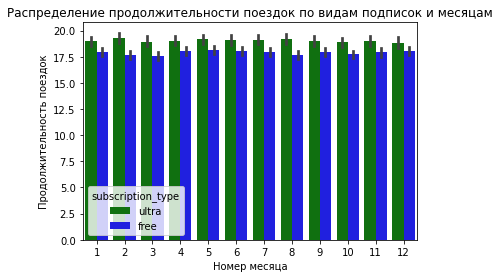

In [40]:
ax = sns.barplot(x = 'month',
            y = 'duration',
            hue = "subscription_type",
            data = full_data,
            palette = ['green', 'blue'])
ax.set_title('Распределение продолжительности поездок по видам подписок и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Продолжительность поездок');

##### Вывод

Проверка  нулевой гипотизы о равенстве времени пользователей на подписке ultra и без подписки показало, что мы отвергаем нулевую гипотезу. Пользователи на тарифе ultra  имеют поездки продолжительностью на 1,5 -2 минуты длиннее чем free пользователи. 

### 6.2.  Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Проверим гипотезу: пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.

H_0: Расстояние (distance) пользователей на подписке ultra = 3130 метров

H_1: Расстояние (distance) пользователей на подписке ultra > 3130 метров

alpha = 0.05

In [41]:
ultra_dist = ultra_data['distance']

interested_value = 3130.0

alpha = 0.05

results = st.ttest_1samp(
    ultra_dist, 
    interested_value,
    alternative='greater')
    
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


##### Вывод
Проверили гипотезу. Среднее расстояние, которое проезжают пользователи на тарифе ultra за поездку статистически значимо не отличается от оптимального расстояния 3130 метров

### 6.3.  Выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

H_0: Выручка (revenue_per_month) пользователей на подписке ultra = выручка (revenue_per_month) пользователей на подписке free

H_1: Выручка (revenue_per_month) пользователей на подписке ultra > выручка (revenue_per_month) пользователей на подписке free

alpha = 0.05

In [42]:
ultra_per_mnth = total_data.loc[total_data.subscription_type == 'ultra', 'revenue_per_month'] 

free_per_mnth = total_data.loc[total_data.subscription_type == 'free', 'revenue_per_month'] 


results = st.ttest_ind(ultra_per_mnth, 
                       free_per_mnth,
                       alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


In [43]:
print(ultra_per_mnth.mean(), free_per_mnth.mean())

362.7921906022502 328.6413651073845


##### Вывод
Проверили гипотезу. Отвергли нулевую гипотизу. Сы можем говорить о том, что выручка с пользователей на подписке ultra превышает выручку с пользователей на подписке free (в среднем на 34 рубля)

### 6.4.  Мобильное приложение снизило количество обращений в техподдержку?

Используем гипотезу о равенстве средних в парных выборках.

Гипотеза :

H0 : μ1 = μ2

H1 : μ1 > μ2

μ1 и μ2 - средние количество обращений в техподдержку до и после обновления мобильного приложения.

Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel()

## 7. Общий вывод

Загрузили 3 набора данных: информацию о пользователях, о поездках и о подписках.

Далее провели проверку данных на наличие пропусков, которых не обнаружилось ни в одной таблице. Изменили тип данных столбца "date" в таблице "data_riders" на тип "дата". Также добавили столбец "month" с номером месяца. Удалили дубликаты строк из таблицы с пользователями.

Произвели исследовательский анализ данных:

Установили, что количество пользователей в разных городах примерно одинаково, нет значительных отклонений. Максимальное количество пользователей зарегистрировано в Пятигорске - 219 человек. Наименьшее количество пользователей в Москве - 168 человек.
Большинство пользователей используют бесплатную подписку - 835 человек, что составляет около 54% от общего числа пользователей. Платную подписку используют 699 пользователей, что составляет примерно 46%.
Возраст пользователей варьируется в диапазоне от 20 до 30 лет.
Обычно пользователи проезжают расстояние от 2,5 до 4 км.
Чаще всего длительность поездки составляет от 13 до 22 минут.
Объединили данные о пользователях, поездках и подписках в одну таблицу. На основе объединенной таблицы создали еще 2 таблицы:

Для пользователей с подпиской "ultra".
Для пользователей с бесплатной подпиской.
Затем визуализировали информацию о расстоянии и времени поездки для пользователей каждой подписки.

Для пользователей с бесплатной подпиской время поездки составляет от 10 до 30 минут, а проезжаемое расстояние - от 2 до 5 км. Есть пользователи, которые проехали даже 6 или 6,5 км.
Для пользователей с платной подпиской. В основном время поездки укладывается в промежуток от 15 до 25 минут. Максимальное расстояние составляет 3 км.
Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц и вывели все данные в отдельную таблицу под названием "total_data". Добавили в таблицу "total_data" столбец с помесячной выручкой "revenue_per_month".

Проверили несколько гипотез:

Пользователи с подпиской тратят больше времени на поездки, чем пользователи с бесплатным тарифом. Результаты исследования позволили отвергнуть нулевую гипотезу.

Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку. Результаты исследования не позволили отвергнуть нулевую гипотезу.

Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. Результаты исследования позволили отвергнуть нулевую гипотезу.